In [58]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
from pandas_ta import macd, stoch
from ib_insync import *
import pytz

In [59]:
import sys, os
sys.path.append("..") 
eastern                  = pytz.timezone('US/Eastern') 

In [60]:
import OpsUtils

In [61]:
client = OpsUtils.my_ib.Connect_to_MYIB("Trading Account", 4001).my_ib()

Connections Parameters 
Host: 127.0.0.1 Port : 4001 Client ID : 23 Read Only : True Account : U5909643 Timeout : 10 


In [62]:
es = OpsUtils.futures.USFuture('ES',client, 'CME')

Created new instance of US Future


In [200]:
data = es.USFuture_hist_data('5 D','1 min')

In [201]:
data.index = data.index.tz_convert (pytz.utc).tz_convert(eastern)

In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5670 entries, 2024-06-25 18:00:00-04:00 to 2024-07-01 20:29:00-04:00
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype                     
---  ------    --------------  -----                     
 0   date      5670 non-null   datetime64[ns, US/Central]
 1   open      5670 non-null   float64                   
 2   high      5670 non-null   float64                   
 3   low       5670 non-null   float64                   
 4   close     5670 non-null   float64                   
 5   volume    5670 non-null   float64                   
 6   average   5670 non-null   float64                   
 7   barCount  5670 non-null   int64                     
 8   color     5670 non-null   object                    
dtypes: datetime64[ns, US/Central](1), float64(6), int64(1), object(1)
memory usage: 443.0+ KB


In [203]:
rthData = data.between_time("09:30", "16:00").copy()

In [204]:
rthData.tail()

,date,open,high,low,close,volume,average,barCount,color
date,,,,,,,,,
2024-07-01 15:56:00-04:00,2024-07-01 14:56:00-05:00,5536.75,5539.50,5536.75,5538.25,8168.0,5538.250,1313,green
2024-07-01 15:57:00-04:00,2024-07-01 14:57:00-05:00,5538.25,5538.75,5536.50,5537.50,7799.0,5537.600,1275,red
2024-07-01 15:58:00-04:00,2024-07-01 14:58:00-05:00,5537.75,5537.75,5533.25,5534.50,11546.0,5535.300,1913,red
2024-07-01 15:59:00-04:00,2024-07-01 14:59:00-05:00,5534.25,5536.00,5532.00,5534.00,43089.0,5534.000,5632,red
2024-07-01 16:00:00-04:00,2024-07-01 15:00:00-05:00,5533.75,5535.00,5531.75,5534.50,18079.0,5533.725,2510,green


In [205]:
data.shape

(5670, 9)

In [206]:
# Calculate mean and standard error of the mean
mean = data.close.mean()
print("Mean of Close {}".format(mean))
sem  = data.close.std() / np.sqrt(data.shape[0])
print("standard error of mean {}".format(sem))
std  = data.close.std()
print("standard deviation of mean {}".format(std))

# Define the confidence level
confidence_level = 0.95

ci =  (mean - 1.96 * (std / sem)), (mean + 1.96 * (std / sem))


# Calculate the confidence interval
# ci = stats.t.interval(confidence_level, len(data)-1, loc=mean, scale=sem)
print(f"The {confidence_level*100}% confidence interval is: {ci}")


Mean of Close 5539.304938271605
standard error of mean 0.16605812717989962
standard deviation of mean 12.504077738328034
The 95.0% confidence interval is: (5391.718109590995, 5686.891766952216)


In [214]:
important_data = rthData[rthData['barCount'] > (3 * rthData['barCount'].mean())]

In [215]:
important_data_dict = {}
for index, row in important_data.iterrows():
    if row['color'] == 'red':
        selling_pressure = (row['volume'] * row['barCount']) / 100.00
        print("Selling Pressure   {:11.2f}    {:%Y-%m-%d : %H:%M}     {:.2f}".format(selling_pressure, index, row['close']))        
        important_data_dict[index] = { 'selling pressure' : selling_pressure,
                                       'price level'      : row['close']}
    if row['color'] == 'green':
        buying_pressure = (row['volume'] * row['barCount']) / 100.00
        print("Buying Pressure    {:11.2f}    {:%Y-%m-%d : %H:%M}     {:.2f}".format(buying_pressure, index, row['close']))        
        important_data_dict[index] = { 'buying pressure' : buying_pressure,
                                       'price level'     : row['close'] }
        

Selling Pressure     259144.60    2024-06-26 : 09:30     5520.75
Selling Pressure     182479.20    2024-06-26 : 11:11     5517.50
Buying Pressure      248332.50    2024-06-26 : 15:55     5546.00
Selling Pressure    2956325.56    2024-06-26 : 15:59     5541.50
Selling Pressure     886130.67    2024-06-26 : 16:00     5538.00
Buying Pressure      185295.11    2024-06-27 : 09:30     5541.75
Selling Pressure     303378.08    2024-06-27 : 09:52     5539.50
Selling Pressure     292187.25    2024-06-27 : 14:00     5537.50
Buying Pressure     2918385.12    2024-06-27 : 15:59     5548.00
Selling Pressure     980276.58    2024-06-27 : 16:00     5547.50
Selling Pressure     385789.11    2024-06-28 : 09:30     5548.25
Buying Pressure      264790.76    2024-06-28 : 09:33     5554.25
Buying Pressure      349455.92    2024-06-28 : 10:00     5565.75
Buying Pressure      330469.46    2024-06-28 : 10:02     5572.75
Buying Pressure      224647.60    2024-06-28 : 10:03     5576.75
Selling Pressure     3282

In [216]:
hist_data = util.df(client.reqHistogramData(
        Future(symbol='ES',currency='USD',exchange='CME',multiplier='50',lastTradeDateOrContractMonth ='202409'),
        period = '5 days',
        useRTH = True
        ))

In [218]:
pressure_levels = pd.DataFrame.from_dict(important_data_dict, orient='index').sort_values(by='price level').sort_index()
display(pressure_levels)
print(pressure_levels.shape)
#display(hist_data.sort_values(by='price'))


,selling pressure,price level,buying pressure
2024-06-26 09:30:00-04:00,259144.60,5520.75,NaN
2024-06-26 11:11:00-04:00,182479.20,5517.50,NaN
2024-06-26 15:55:00-04:00,NaN,5546.00,248332.50
2024-06-26 15:59:00-04:00,2956325.56,5541.50,NaN
2024-06-26 16:00:00-04:00,886130.67,5538.00,NaN
2024-06-27 09:30:00-04:00,NaN,5541.75,185295.11
2024-06-27 09:52:00-04:00,303378.08,5539.50,NaN
2024-06-27 14:00:00-04:00,292187.25,5537.50,NaN
2024-06-27 15:59:00-04:00,NaN,5548.00,2918385.12
2024-06-27 16:00:00-04:00,980276.58,5547.50,NaN


(40, 3)


In [220]:
pressure_levels.reset_index().merge(hist_data, how='left', left_on='price level', right_on='price').sort_values(by='price').sort_index()

,index,selling pressure,price level,buying pressure,price,count
0,2024-06-26 09:30:00-04:00,259144.60,5520.75,NaN,5520.75,27858
1,2024-06-26 11:11:00-04:00,182479.20,5517.50,NaN,5517.50,10458
2,2024-06-26 15:55:00-04:00,NaN,5546.00,248332.50,5546.00,15599
3,2024-06-26 15:59:00-04:00,2956325.56,5541.50,NaN,5541.50,36865
4,2024-06-26 16:00:00-04:00,886130.67,5538.00,NaN,5538.00,22401
5,2024-06-27 09:30:00-04:00,NaN,5541.75,185295.11,5541.75,36755
6,2024-06-27 09:52:00-04:00,303378.08,5539.50,NaN,5539.50,21339
7,2024-06-27 14:00:00-04:00,292187.25,5537.50,NaN,5537.50,35721
8,2024-06-27 15:59:00-04:00,NaN,5548.00,2918385.12,5548.00,23109
9,2024-06-27 16:00:00-04:00,980276.58,5547.50,NaN,5547.50,23805


,price,count
count,323.000000,323.000000
mean,5544.750000,17021.826625
std,23.346574,17134.941794
min,5504.500000,25.000000
25%,5524.625000,3694.500000
50%,5544.750000,9633.000000
75%,5564.875000,27760.000000
max,5585.000000,63522.000000


<BarContainer object of 323 artists>

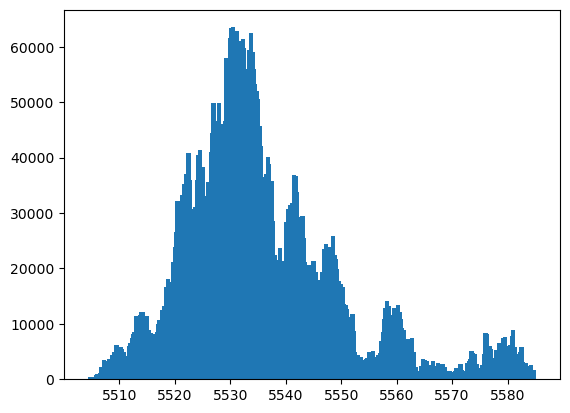

In [212]:
display(hist_data.describe())
plt.bar(data = hist_data, height='count', x='price')


In [186]:
# levels = hist_data.where(hist_data['count'] > (hist_data['count'].max() / 1.1)).dropna().sort_values(by='price')
# print("Significant Levels \n{}".format(levels))